## TASK-3

`Correlation between News anad Stock Movement`

`Loading the Date`

In [1]:
import os
os.chdir('../scripts')

In [2]:
%load_ext autoreload
%autoreload 2

import data_processing as dp
import correlation as corr
import visualization as vis
import pandas as pd
import importlib


In [3]:
importlib.reload(dp)

news_data = dp.load_data('../datas/raw_analyst_ratings.csv')

stock_data = dp.load_data('../datas/yfinance_data/GOOG_historical_data.csv')

print(stock_data.head())
print(news_data.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4          

`Normalize Dates`

In [4]:
importlib.reload(corr)

merged_data = corr.normalizeAndMerge_data(news_data, stock_data)
print(merged_data.head())

   Unnamed: 0                                           headline  \
0          10    30 Stocks Moving in Friday's Pre-Market Session   
1          11  SVB Leerink Maintains Outperform on Agilent Te...   
2          12  8 Stocks Moving In Thursday's After-Hours Session   
3          13  Agilent Technologies shares are trading higher...   
4          14  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   

                                                 url                publisher  \
0  https://www.benzinga.com/news/20/05/16092879/3...               Lisa Levin   
1  https://www.benzinga.com/news/20/05/16092270/s...  vishwanath@benzinga.com   
2  https://www.benzinga.com/news/20/05/16089803/8...             Tyree Gorges   
3  https://www.benzinga.com/wiim/20/05/16089218/a...        Benzinga Newsdesk   
4  https://www.benzinga.com/news/earnings/20/05/1...        Benzinga Newsdesk   

        date stock        Date       Open       High        Low      Close  \
0 2020-05-22     A  2020-0

`Perform Sentiment Analysis`

In [5]:
merged_data['sentiment'] = dp.analyze_sentiment(merged_data)['sentiment']

merged_data['sentiment'].head()

100%|██████████| 1325/1325 [03:59<00:00,  5.52it/s]


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock', 'Date',
       'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits', 'sentiment'],
      dtype='object')


0    0.000
1    0.000
2    0.000
3    0.296
4    0.000
Name: sentiment, dtype: float64

In [6]:
merged_data['sentiment'].describe()

count    1.324416e+06
mean     6.665221e-02
std      2.696440e-01
min     -9.578000e-01
25%      0.000000e+00
50%      0.000000e+00
75%      2.023000e-01
max      9.741000e-01
Name: sentiment, dtype: float64

`Calculate Stock Movements`

`Compute Daily Returns`

In [7]:
stock_data['daily_return'] = stock_data['Close'].pct_change()

merged_data = merged_data.dropna()

In [8]:
daily_sentiment = merged_data.groupby('date')['sentiment'].mean().reset_index()

`Visualize sentiment score over time`

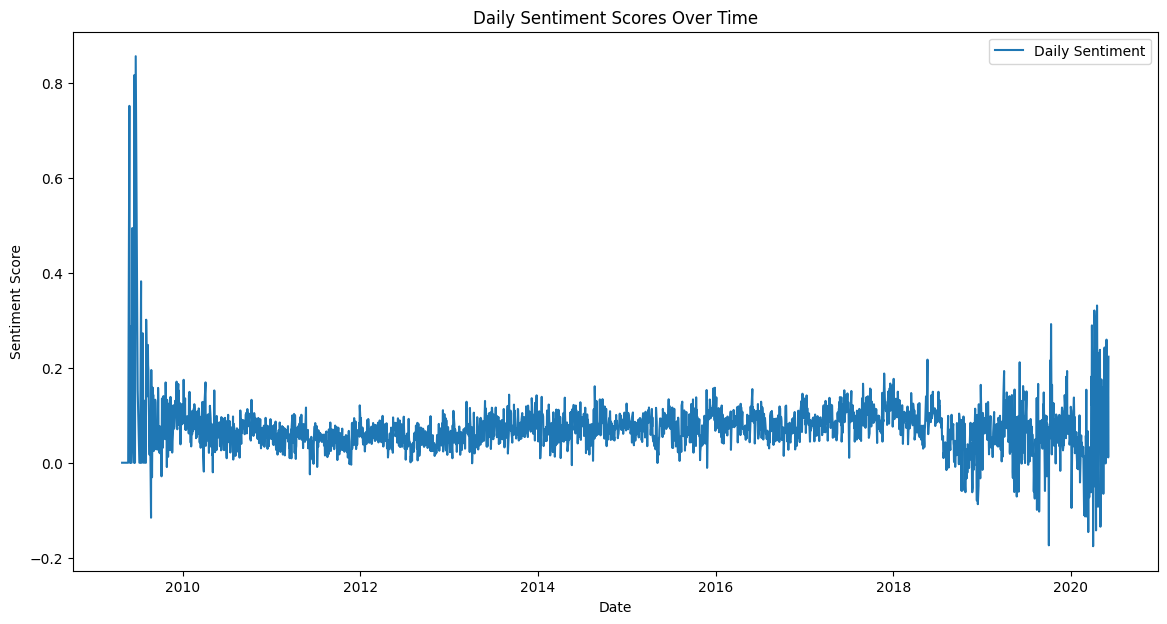

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(daily_sentiment['date'], daily_sentiment['sentiment'], label='Daily Sentiment')
plt.title('Daily Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

`Calculate Correlation`

In [11]:
correlation_data = pd.merge(daily_sentiment, stock_data[['date', 'daily_return']], on='date')

`Visualize the correlation`

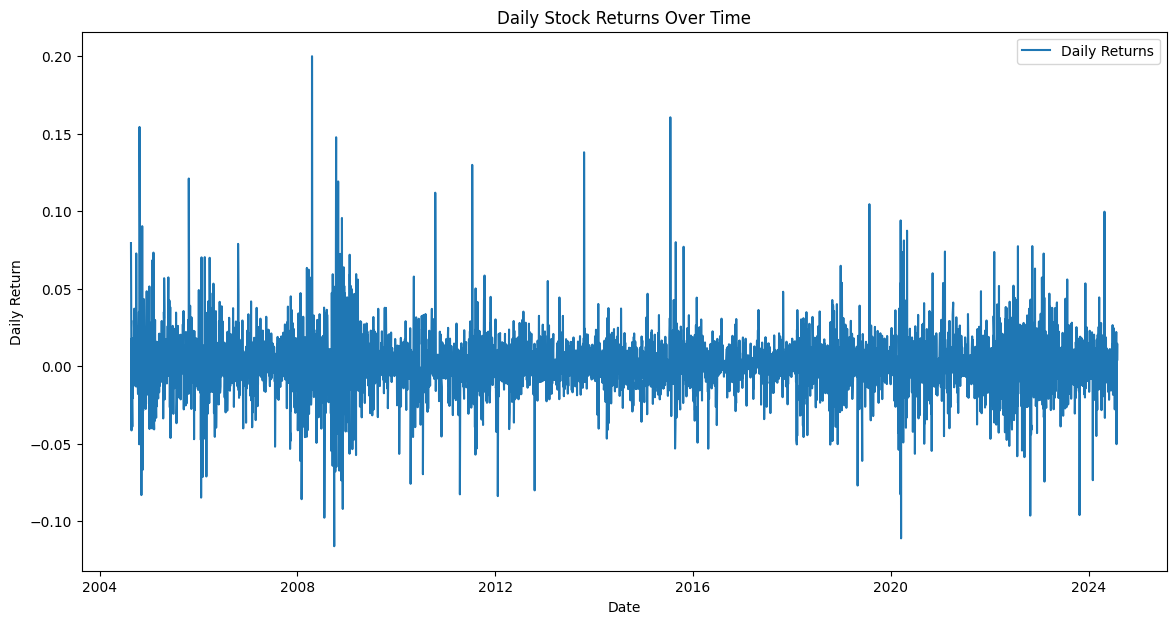

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data['date'], stock_data['daily_return'], label='Daily Returns')
plt.title('Daily Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


In [13]:
correlation = correlation_data['sentiment'].corr(correlation_data['daily_return'])
print(f"Pearson correlation coeffiecient: {correlation}")

Pearson correlation coeffiecient: 0.13285989610765658


`Scatter Plot of Sentiment vs. Daily Returns`

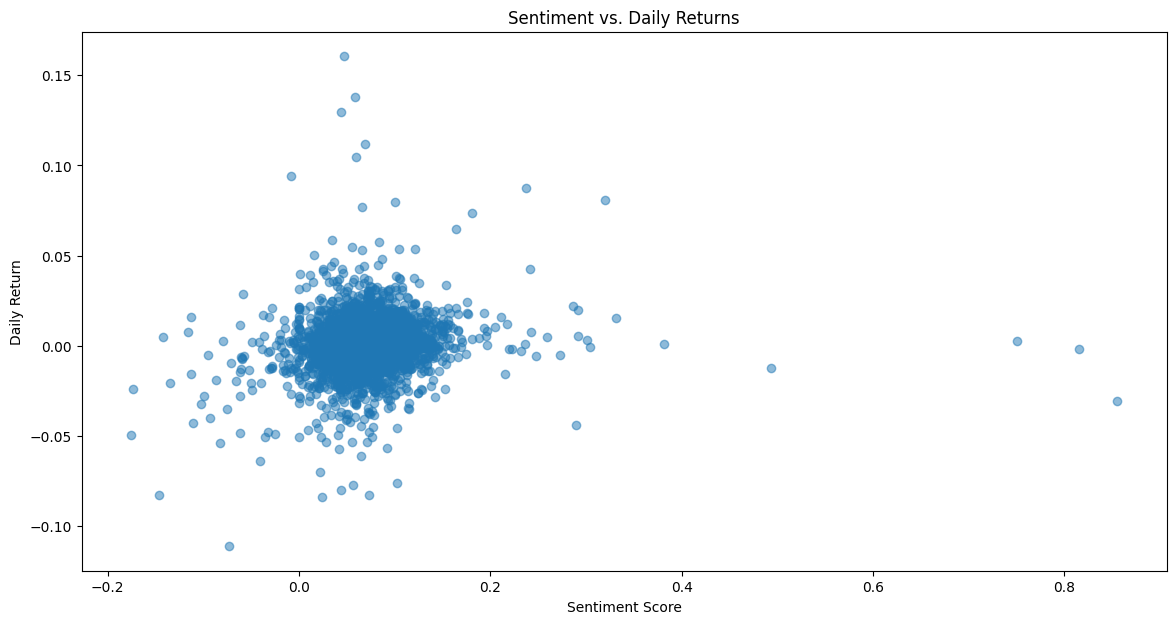

In [14]:
plt.figure(figsize=(14, 7))
plt.scatter(correlation_data['sentiment'], correlation_data['daily_return'], alpha=0.5)
plt.title('Sentiment vs. Daily Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.show()